# BUSINESS PROBLEM:

INX Future Inc.has been a leading data analytics and automation solution provider with a strong reputation as top employer. However,in recent years, employee performnace indexes have declined, leading to increased service delivery escalations and an 8-percentage-point drop in clinet satisfaction.

The CEO,Mr.Brain, is concerned about addressing non-performace without negatively impacting overall employee morale or the company's employer brand.A data-driven approach is needed to analyze employee performance data, identify the root casuses of declining performance, and provide actionable insights. The goal is to implement effective interventions while maintaining a positive work culture and attracting to talent.

This project aims to leverage data science techniques to uncover key factors affecting employee performance and provide clear indicators of non-performance employees, ensuring informed decision-making that balance needs with employee engagement.

# OBJECTIVES:

-> Anlayze employee data to identify the root casuses of decling performance.

-> Determine key factors affecting performnace ratings and employee satisfaction.

-> Provide insights into employee attrition and how it relates to performance.

# DOMAIN ANALYSIS:

The dataset consists of 1200 employee records with 28 features related to employee demographics,work experience,satisfaction levels, and performance.key columns include:

1.Age - Age of the employee

2.Gender - Gender of the employee

3.EducationBackground - Education background of the employee

4.MaritalStatus - Married,unmarries or divorced

5.Empdepartment - The department of the employee

6.EmpjobRole - Job role of the employee(Sales,Executive,Developer etc)

7.BusinessTravelFrequency - If Business Travelling is present, How frequent is it?

8.DistanceFromHome - Distance of employee home to company

9.EmpEducationLevel - Highest education level of the employee

10.EmpEnvironmentSatisfaction - Working environment Satisfaction rating of employee

11.EmpHourlyrate - Hourly rate he is receiving

12.EmpJobInvolvement - Involvement in job in a scale of 4

13.EmpJobLevel - Job level of employee in scale of 4

14.EmpJobSatisfaction - Satisfaction of employee in their job

15.NumCompaninesWorked - Number of companies worked previously

16.OverTime - Overtime is there or not?

17.EmpLastSalaryHikePercent - Last salary hike percentage of employees

18.EmpRelationshipSatisfaction - Satisfaction with employer relationship in scale of 4

19.TotalWorkExperienceInYears - Total work experience in years

20.TrainingTimesLastYear - No of trainings attented in a scale of 4

21.EmpWorkLifeBalance - Worklife balance of employees in a scale of 4

22.ExperienceYearsAtThisCompany - No of Years experience in the current company

23.ExperienceYearsInCurrentRole - No of Years experience in the role

24.YearsSinceLastPromotion -No of Years since Last promotion of employee

25.YearsWithCurrManager - No of Years with the current manager

26.Attrition - Employee left the company or not

27.Performance - target column is performance rating of the employees (2-Low,3-Good,4-High)

# LIBRARIES

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from scipy import stats
import plotly.io as pio
import pylab

In [10]:
#To avoid warnings
import warnings
warnings.filterwarnings('ignore')

# LOADING DATA

In [15]:
data=pd.read_csv("INX_DATA.csv")

In [17]:
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

# BASIC CHECKS

In [22]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [24]:
data.tail()

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

-> In this data two type of data is available[int64,object]

 **Some categorical columns are encoded as follows:**

-> EmpEducationlevel : 1-Below college,2-College,3-Bachelor,4-Master,5-Doctor

->EmpEnvironmentSatisfaction : 1-Low,2-Medium,3-High,4-VeryHigh

->EmpJobInvolvement : 1-Low,2-Medium,3-High,4-VeryHigh

->EmpJobSatisfaction : 1-Low,2-Medium,3-Excellent,4-OutStanding

->EmpWorkLifeBalance : 1-Bad,2-Good,3-High,4-VeryHigh

->RelationshipSatisfaction :1-Low,2-Medium,3-High,4-Very High

->PerformanceRating : 1-Low,2-Good,3-Excellent,4-Outstanding

### CATEGORICAL FEATURES

In [31]:
cat_data=data.select_dtypes(include='O')
cat_data.columns

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

### UNIQUE CATEGORICAL FEATURES

In [34]:
#Getting unique categorical features
for i in cat_data:
    print(i,cat_data[i].unique())
    print(cat_data[i].value_counts())
    print("----------------------------------------------------------------------------------")

EmpNumber ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
EmpNumber
E1001000    1
E100346     1
E100342     1
E100341     1
E100340     1
           ..
E1001718    1
E1001717    1
E1001716    1
E1001713    1
E100998     1
Name: count, Length: 1200, dtype: int64
----------------------------------------------------------------------------------
Gender ['Male' 'Female']
Gender
Male      725
Female    475
Name: count, dtype: int64
----------------------------------------------------------------------------------
EducationBackground ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64
----------------------------------------------------------------------------------
MaritalStatus ['Single' 'Married' 'Divorced']
MaritalStatus
Married     548
Single    

### STATISTICAL MEASURES OF CATEGORICAL DATA

In [37]:
cat_data.describe(include='O').T

count unique              top  freq
EmpNumber                1200   1200         E1001000     1
Gender                   1200      2             Male   725
EducationBackground      1200      6    Life Sciences   492
MaritalStatus            1200      3          Married   548
EmpDepartment            1200      6            Sales   373
EmpJobRole               1200     19  Sales Executive   270
BusinessTravelFrequency  1200      3    Travel_Rarely   846
OverTime                 1200      2               No   847
Attrition                1200      2               No  1022

### NUMERICAL FEATURES

In [40]:
num_data = data.select_dtypes(include=['int64','float64'])
num_data.columns

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

In [42]:
num_data.describe().T

count       mean        std   min   25%   50%  \
Age                           1200.0  36.918333   9.087289  18.0  30.0  36.0   
DistanceFromHome              1200.0   9.165833   8.176636   1.0   2.0   7.0   
EmpEducationLevel             1200.0   2.892500   1.044120   1.0   2.0   3.0   
EmpEnvironmentSatisfaction    1200.0   2.715833   1.090599   1.0   2.0   3.0   
EmpHourlyRate                 1200.0  65.981667  20.211302  30.0  48.0  66.0   
EmpJobInvolvement             1200.0   2.731667   0.707164   1.0   2.0   3.0   
EmpJobLevel                   1200.0   2.067500   1.107836   1.0   1.0   2.0   
EmpJobSatisfaction            1200.0   2.732500   1.100888   1.0   2.0   3.0   
NumCompaniesWorked            1200.0   2.665000   2.469384   0.0   1.0   2.0   
EmpLastSalaryHikePercent      1200.0  15.222500   3.625918  11.0  12.0  14.0   
EmpRelationshipSatisfaction   1200.0   2.725000   1.075642   1.0   2.0   3.0   
TotalWorkExperienceInYears    1200.0  11.330000   7.797228   0.0   6.0  10.0   
TrainingTimesLastYear         1200.0   2.785833   1.263446   0.0   2.0   3.0   
EmpWorkLifeBalance            1200.0   2.744167   0.699374   1.0   2.0   3.0   
ExperienceYearsAtThisCompany  1200.0   7.077500   6.236899   0.0   3.0   5.0   
ExperienceYearsInCurrentRole  1200.0   4.291667   3.613744   0.0   2.0   3.0   
YearsSinceLastPromotion       1200.0   2.194167   3.221560   0.0   0.0   1.0   
YearsWithCurrManager          1200.0   4.105000   3.541576   0.0   2.0   3.0   
PerformanceRating             1200.0   2.948333   0.518866   2.0   3.0   3.0   

                               75%    max  
Age                           43.0   60.0  
DistanceFromHome              14.0   29.0  
EmpEducationLevel              4.0    5.0  
EmpEnvironmentSatisfaction     4.0    4.0  
EmpHourlyRate                 83.0  100.0  
EmpJobInvolvement              3.0    4.0  
EmpJobLevel                    3.0    5.0  
EmpJobSatisfaction             4.0    4.0  
NumCompaniesWorked             4.0    9.0  
EmpLastSalaryHikePercent      18.0   25.0  
EmpRelationshipSatisfaction    4.0    4.0  
TotalWorkExperienceInYears    15.0   40.0  
TrainingTimesLastYear          3.0    6.0  
EmpWorkLifeBalance             3.0    4.0  
ExperienceYearsAtThisCompany  10.0   40.0  
ExperienceYearsInCurrentRole   7.0   18.0  
YearsSinceLastPromotion        3.0   15.0  
YearsWithCurrManager           7.0   17.0  
PerformanceRating              3.0    4.0

# EDA

In [45]:
#Here we are appending the columns having less than or equal to 10 unique values and we are considering those as categorical for instance
data_cat=[]
for i in data:
    if len(data[i].unique())<=10:
        data_cat.append(i)

In [47]:
data_cat

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'BusinessTravelFrequency',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'OverTime',
 'EmpRelationshipSatisfaction',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'Attrition',
 'PerformanceRating']

In [49]:
#List indicies must be integer or slices not str
data_cat1=data[data_cat]

In [51]:
len(data_cat)

17

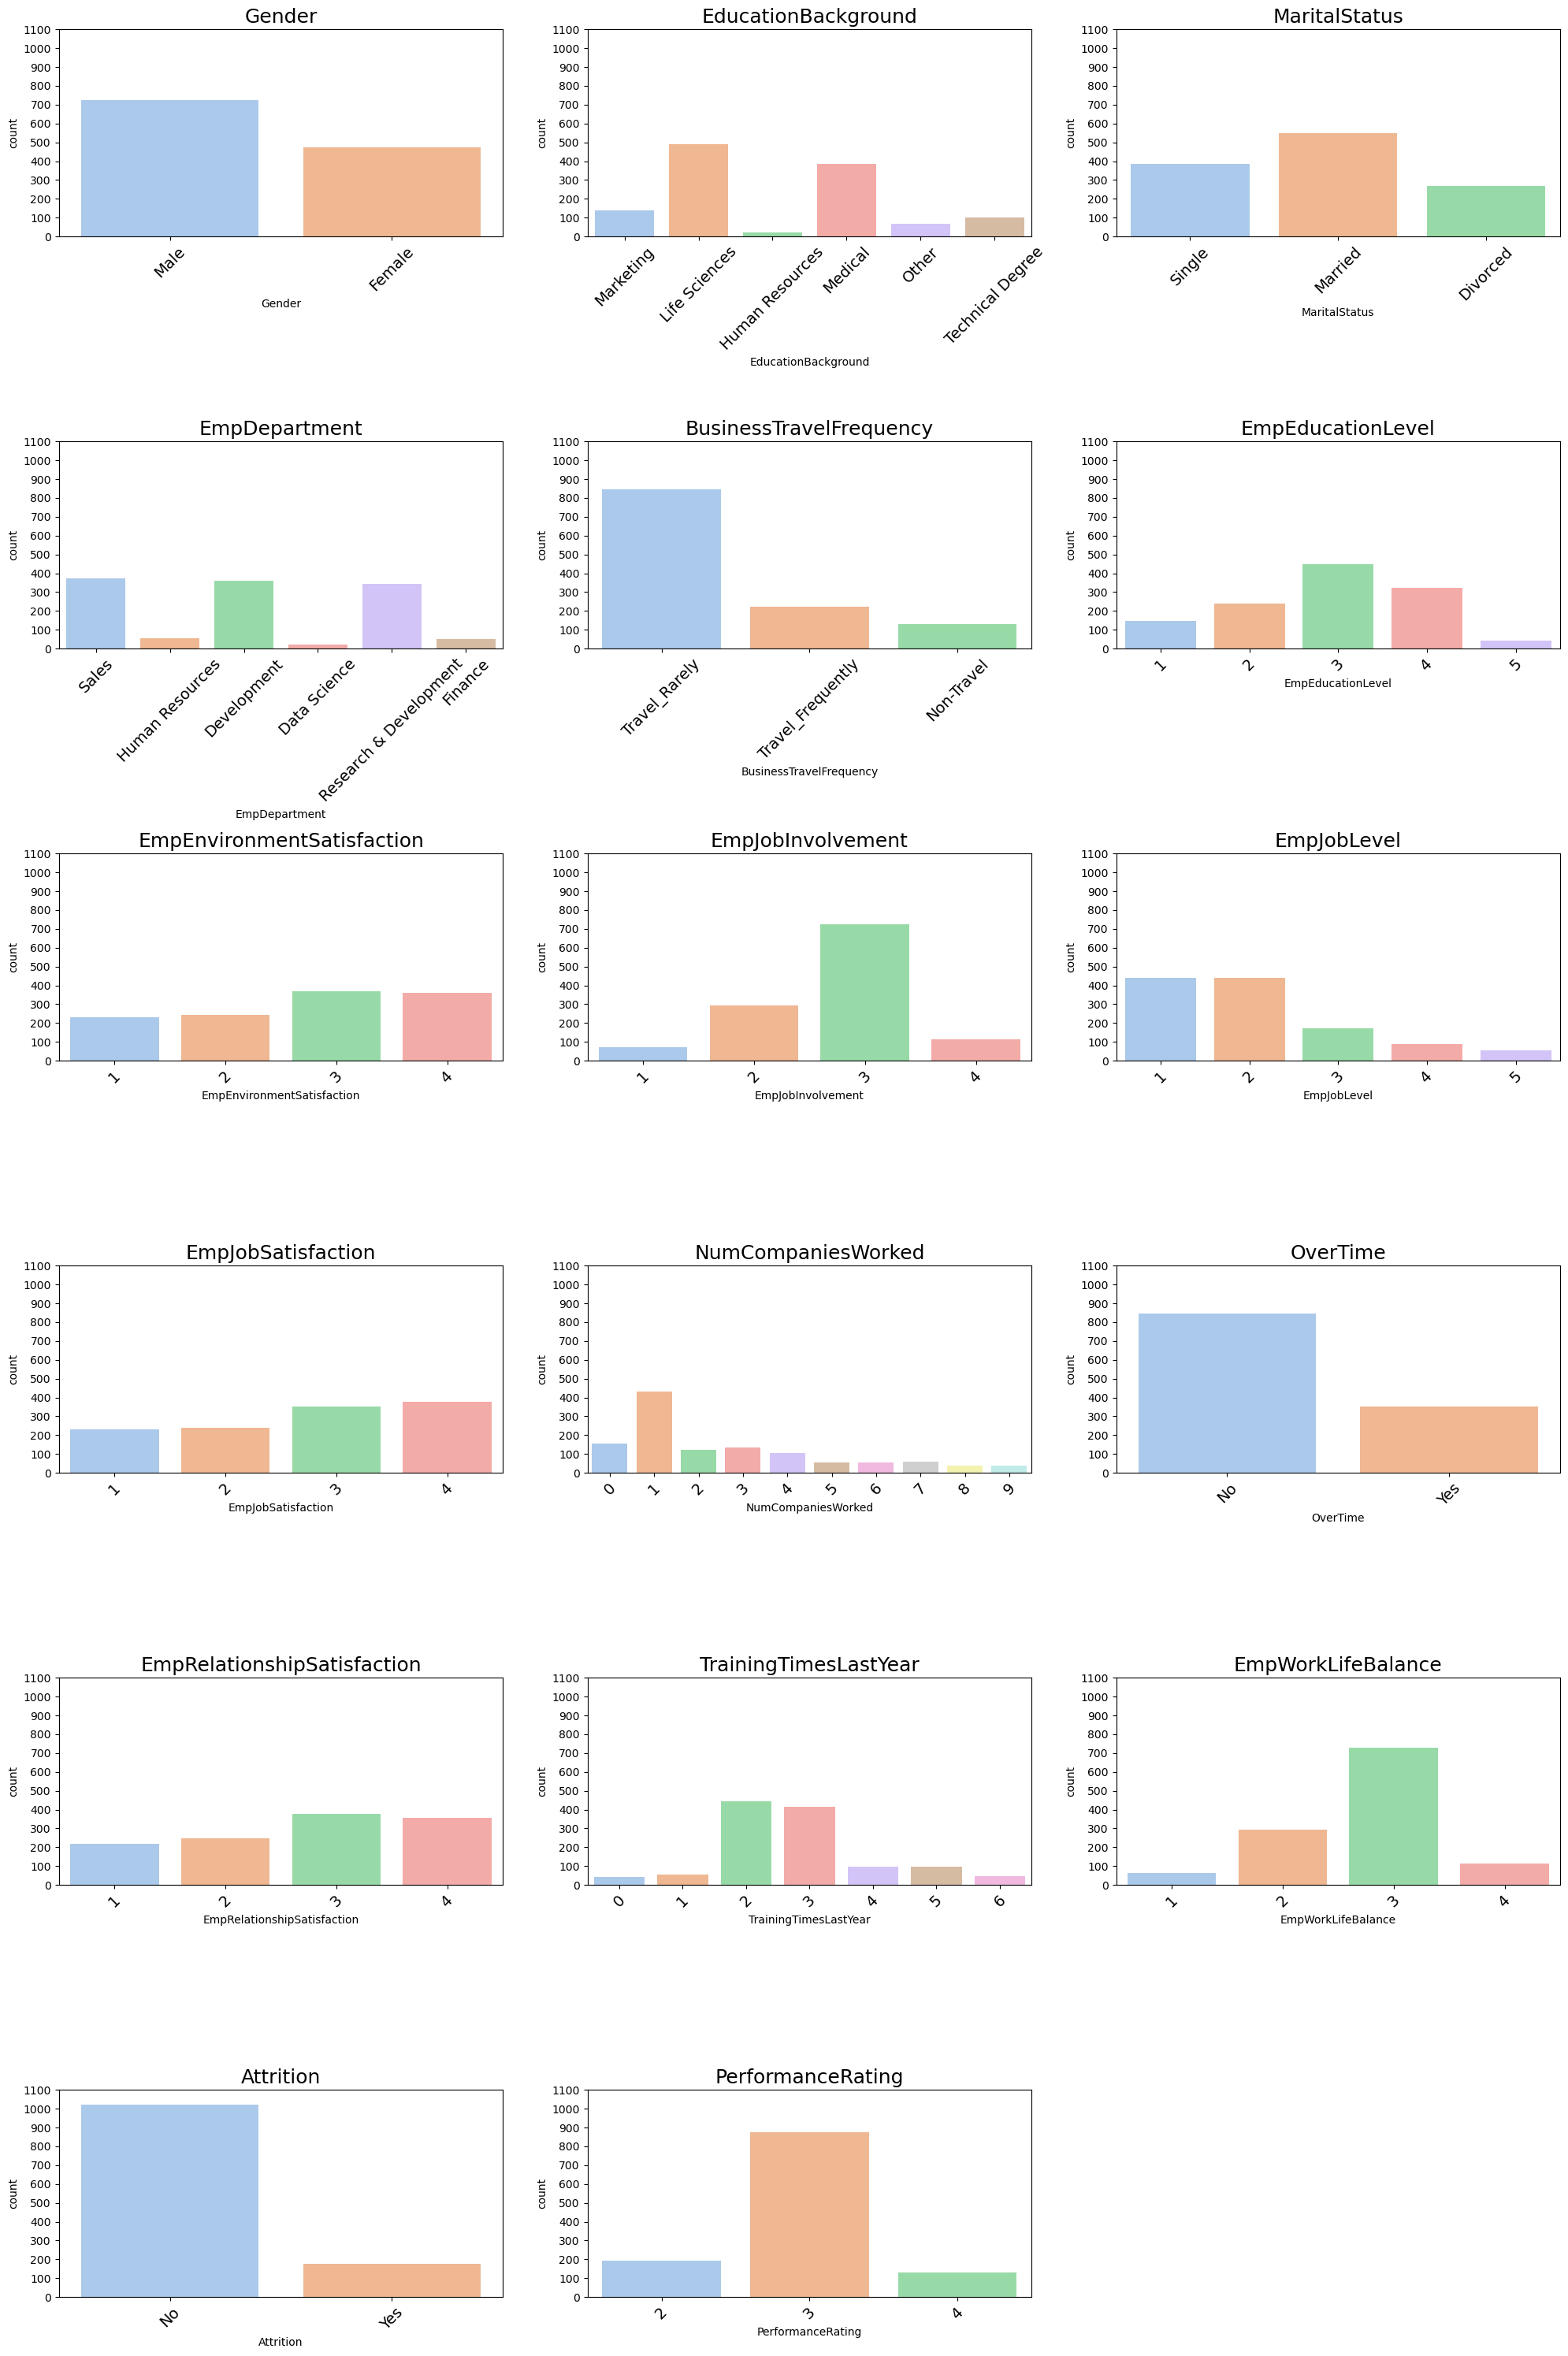

In [53]:
plt.figure(figsize=(20,30))
plotno = 1
for i in data_cat1:
    if plotno <= 17:
     plt.subplot(6,3,plotno)
     sns.countplot(x=data_cat1[i],palette='pastel')
     plt.ylim(0, 1000)  # Set y-axis limits from 100 to 1000
     plt.yticks(range(0, 1200, 100))  # Set y-axis ticks at intervals of 100
     plt.xticks(rotation=45,fontsize=14)
     plt.title(f"{i}", fontsize=18)
     plotno+=1
plt.tight_layout()
plt.show()

**1.Gender:**

60% of employees are male and 40% of employees were female

**2.EducationBackground :

** When we look in the education background 41% of employees are from Lifescience,32% from medical backgrounds and then Marketing and Technical degrees

**3.Marital Status:** 

45% of emplyees are married,32% were unmarried and rest of the employees are divorced.

**4.EmpDepartment:**

31% of employees working in sales dept,30% were in development dept,23% were in research and development and rest of the employeers were in HR,Data Science and finance which is less than 10%
                 
**5.BusinessTraveFrequency**

70% of the people travel rarely, 18% travel frequently rest do not travel.
                          
**6.EmpEducationLevel :** 
->Education Level 1: 10-15%

->Education Level 2: 15-20%
                      
->Education Level 3: 30-35% (Highest)
                      
->Education Level 4: 25-30%
                      
->Education Level 5: 5% (Lowest)

**7.EmpEnvironmentSatisfaction:** 

31% of employees very highly and 30% highly satisfied with the working environment..20% of people with a moderate satisfaction and 19% people completly not satisfied with the working environment which is a high number.

**8. EmpJobInvolvement:***

Around 85% of employees have high involvement in thier job but rest of the employees are partialy and minimaly involved.

**9. EmpJobLevel** 

->Most employees are in Job Levels 1 and 2 (30-35% each).

->Higher job levels (4 and 5) have fewer employees (5-10%).
                
->Job Level 3 is moderately populated (~15-20%).
   
**10.EmpJobSatisfaction:** 

->Job levels (3 & 4) has higher satisfaction (55-60%)

->Job levels (1 & 2) has  Lower satisfaction (40-45%) 

**11.NumCompaniesWorked:**

-> Most employees (60-65%) have worked at one or no other company.

-> A small portion (10-15%) has worked in 4 or more companies.
                           
-> Employees with less than 2 previous companies dominate (~60%), suggesting the company attracts fresh talent or retains                                  employees well.
                       
**12.OverTime:** 

->The majority of employees fall into the "No" category (70-75%)

->A smaller proportion (25-30%) falls into the "Yes" category,limited number of employees are affected by this factor.

**13.EmpRelationshipSatisfaction:**

-> Higher satisfaction levels (3 & 4) dominate (56-60% of  employees), indicating that most employees are satisfied                                        with their workplace relationships.

-> Lower satisfaction levels (1 & 2) make up 40-44%, which is still a significant portion and suggests room for                                            improvement.
                                
**14.TrainingTimesLastYear:** 

->Most employees attended training sessions 2-3 times (55-60%), indicating  a moderate training culture.

->Very few employees (≤10%) had no training at all.
                              
-> Training beyond 4 times is significantly lower (20%).

**15.EmpWorkLifeBalance:** 

-> Majority (60%) rate their work-life balance as "Good".

->Around 20% feel their work-life balance is only "Fair".
                           
->A small but notable group (5-7%) rates it as "Poor".
                           
-> Very few employees (10%) rate it as "Excellent".
                       
**16.Attrition :** 

-> Majority (80-85%) of employees are retained, indicating relatively stable workforce  retention.

->Around 15-20% attrition is significant, which could impact productivity.

**17.PerformanceRating:** 

->Most employees (65-70%) have a performance rating of 3, indicating an average or satisfactory performance across the                                    company.

-> Only 10-15% have an excellent rating (4), suggesting a smaller percentage of  high performers.
                          
->15-20% have a lower rating (2), which could indicate performance issues requiring attention.

#### FOR CONTINOUS DATA

In [57]:
#Here we are appending the columns having less than or equal to 10 unique values and we are considering those as continous Data for instance
data_cont=[]
for i in data:
    if len(data[i].unique())>10:
        data_cont.append(i)

In [59]:
data_cont

['EmpNumber',
 'Age',
 'EmpJobRole',
 'DistanceFromHome',
 'EmpHourlyRate',
 'EmpLastSalaryHikePercent',
 'TotalWorkExperienceInYears',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [61]:
len(data_cont)

11

In [63]:
#List indicies must be integer or slices not str
data_cont1=data[data_cont]

In [65]:
len(data_cont)

11

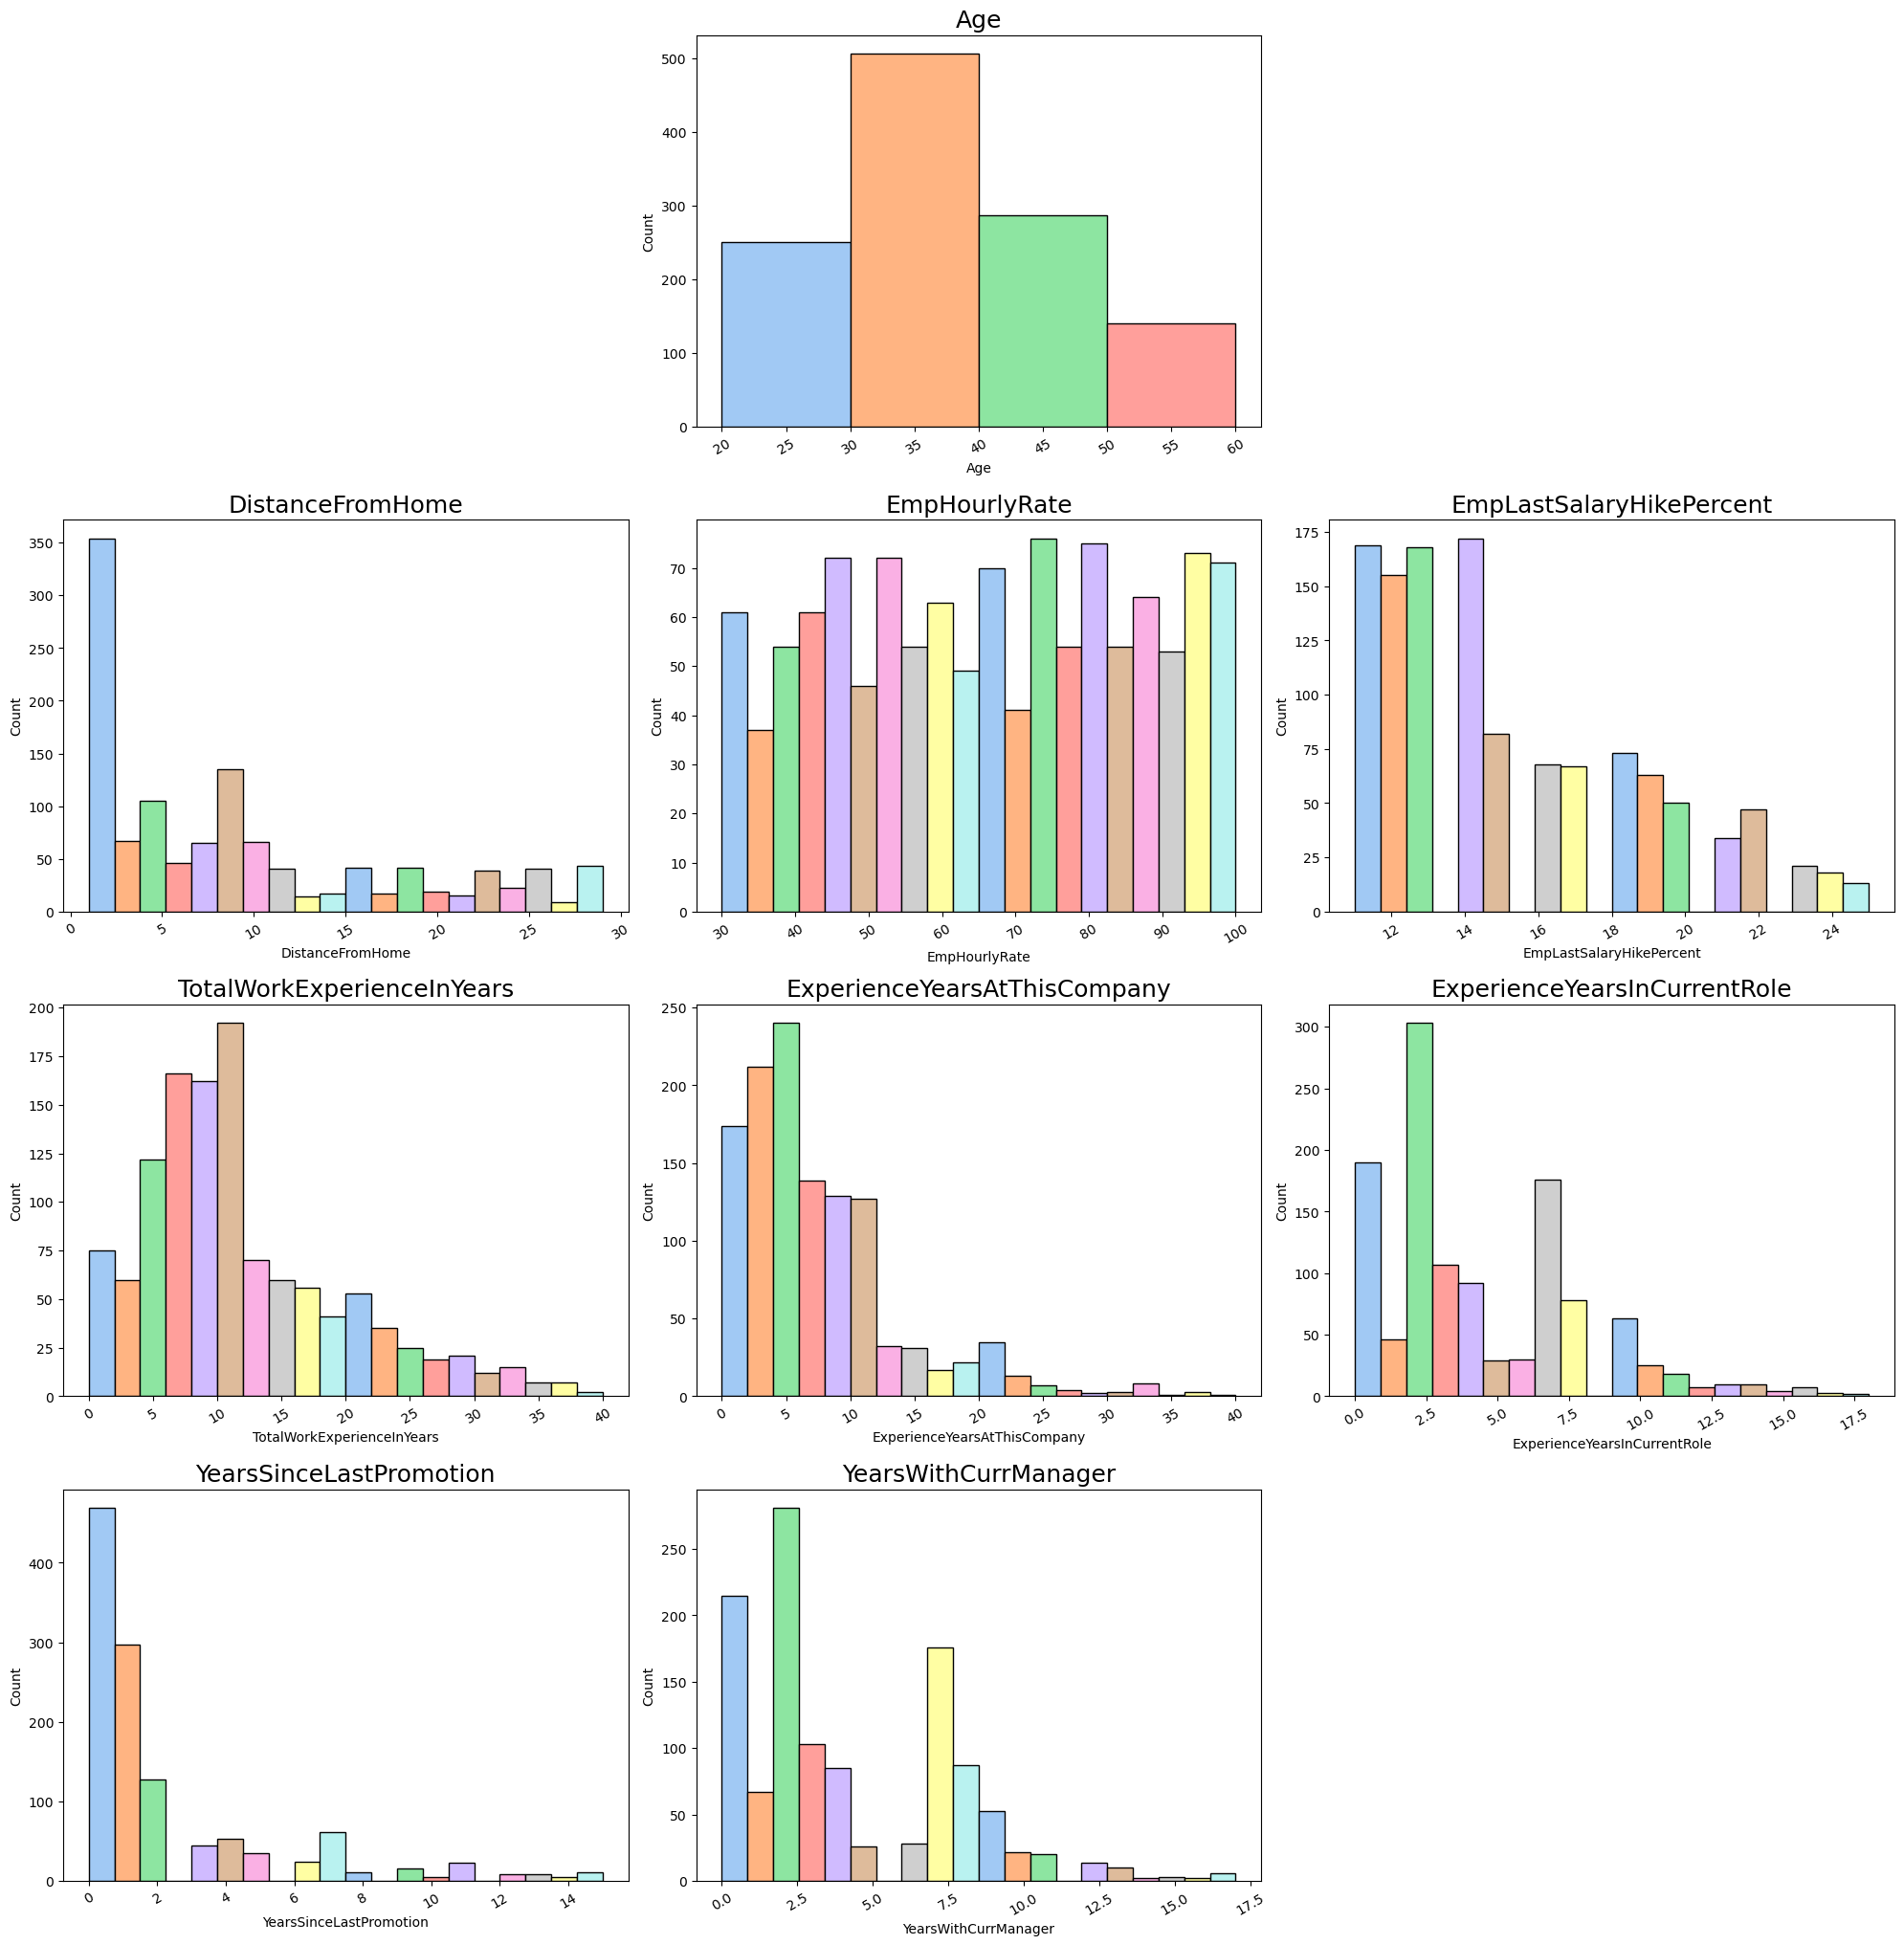

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 30))
plotno = 1

for i in data_cont1:
    if plotno <= 11:  
        if plotno in [1, 3]:  # Skip plot number 1 because we don't need EmpNum and 3
            plotno += 1
            continue
        
        plt.subplot(6, 3, plotno)

        # Special bin settings for 'Age' column
        if i.lower() == "age":
            bins = np.arange(20, 70, 10)  # Bins for 20-30, 30-40, ... up to 60+
        else:
            bins = 20  # Default bin setting for other columns
        
        ax = sns.histplot(data=data_cont1, x=i, bins=bins)

        # Assign different colors to each bar dynamically
        colors = sns.color_palette("pastel", len(ax.patches))
        for bar, color in zip(ax.patches, colors):
            bar.set_facecolor(color)

        plt.xticks(rotation=30)
        plt.title(f"{i}", fontsize=18)
        plotno += 1  

plt.tight_layout()
plt.show()

**1.Age:**

->The highest number of employees fall in the 30-40 years age group, indicating that the workforce is primarily mid-career professionals.

->The 40-50 age group has a decent number of employees but is significantly lower than the 30-40 group.

->The 20-30 age group has fewer employees, suggesting that the company might have fewer fresh graduates or early-career hires.

->Similarly, the 50-60 age group has the lowest count, indicating that the number of senior employees nearing retirement is relatively small.

**2.DistanceFromHome:**

->The highest number of employees live within 0-5 km of their workplace, indicating that proximity to work is a key factor for most employees.

->As the distance from home increases beyond 5 km, the number of employees gradually declines, suggesting that fewer employees are willing to travel 
long distances for work.

->There are still some employees who live between 20-30 km away from work, but their numbers are significantly lower compared to those living closer.

**3.EmpHourlyRate:**

->Most employees earn between 40-80 per hour (60-70% of total employees).

->Fewer employees earn below 30 or above 90 per hour (20% combined).

->Salaries are evenly spread, with no extreme highs or lows in any category.

->Higher salaries are less common, indicating that only a small group of employees earn above 90 per hour.

**4.EmpLastSalaryHikePercent:**

->Most employees received a 12-14% salary hike (largest group).

->Fewer employees got hikes above 20%, showing high hikes are rare.

->As the hike percentage increases, the number of employees decreases.

->Very few employees received 24% or higher salary hikes.


**5.TotalWorkExperienceInYears:**

->Most employees have 5-10 years of experience (largest group).

->Experience distribution decreases as years increase—fewer employees have 20+ years of experience.

->Very few employees have 30+ years of experience, indicating a younger workforce.

**6.ExperienceYearsAtThisCompany:**

->Around 60% of employees have 0-5 years of experience at the company.

->About 25% of employees have 6-15 years of experience.

->Less than 10% have more than 15 years of experience.

->Very few employees (under 5%) have over 20 years of experience.

**7.ExperienceYearsInCurrentRole:**

->About 70% of employees have been with the company for 0-10 years.

->Around 20% have stayed between 11-20 years.

->Less than 10% have been with the company for more than 20 years.

**8.YearsSinceLastPromotion:**

->More than 60% of employees were promoted within the last 1-2 years.

->Around 25% have not received a promotion in the last 3-5 years

->Less than 15% have gone more than 6 years without a promotion.

**9.YearsWithCurrManager:**

->Over 50% of employees have been with their current manager for 0-3 years.

->Around 30% have been with the same manager for 4-7 years.

->Less than 20% have had the same manager for more than 8 years

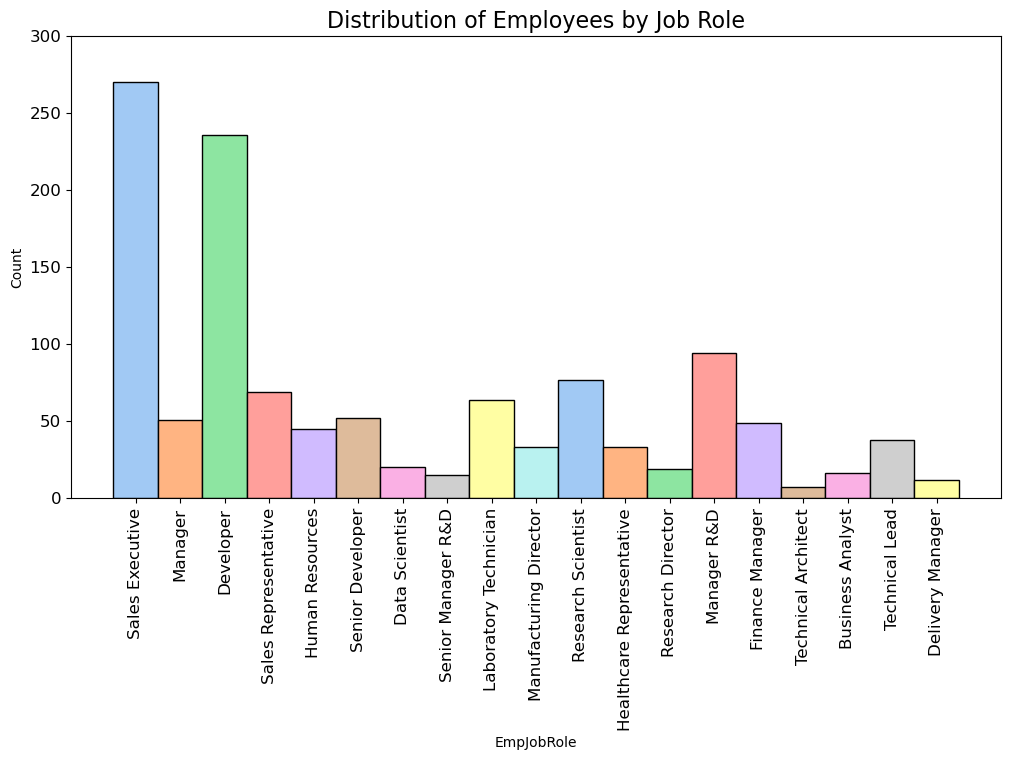

In [70]:
#UNIVARIATE ANALYSIS FOR EmpJobRole

plt.figure(figsize=(12, 6))
ax = sns.histplot(data=data_cont1, x="EmpJobRole", discrete=True)

# Generate a color palette with unique colors for each bar
colors = sns.color_palette("pastel", len(ax.patches))

# Assign a different color to each bar
for bar, color in zip(ax.patches, colors):
    bar.set_facecolor(color)
#set y-axis limit
plt.ylim(0,300)
# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Set title
plt.title("Distribution of Employees by Job Role", fontsize=16)

plt.show()


->Sales Executives: 28% (Largest group)

->Managers: 22%

->Developers: 12%

->Research Scientists & Research Directors: 10% each.

->Sales Representatives, Human Resources, and Senior Developers: 5% each(approx)

->Other roles (Finance Manager, Technical Architect, Business Analyst, etc.): 3-4% each.

->Sales & Management roles make up nearly half of the workforce.

->Technical & Research roles are significant but smaller in proportion.

# BIVARIATE ANALYSIS

#### DISCRETE AND CATEGORICAL DATA

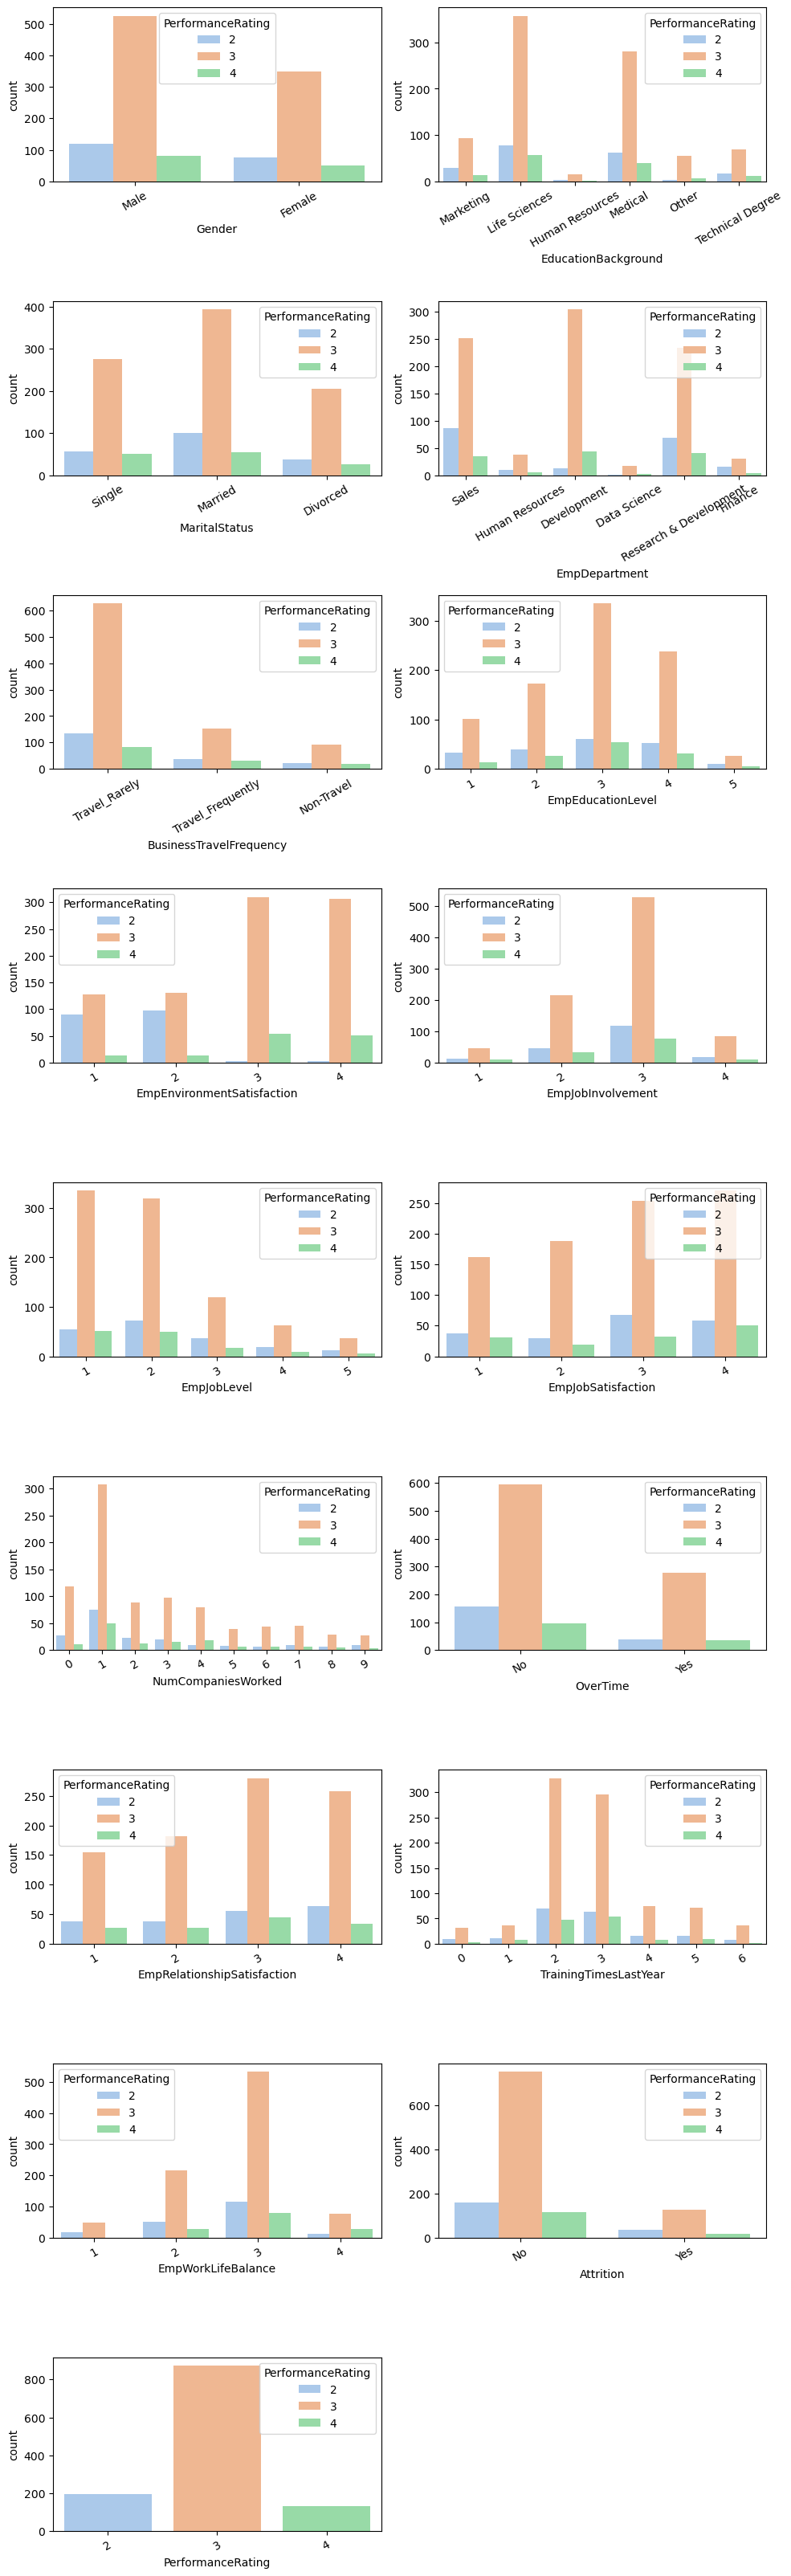

In [75]:
plt.figure(figsize = (10,50))
plotnumber = 1
for i in data_cat1:
    plt.subplot(14,2, plotnumber)
    #plt.xticks(rotation=30)
    sns.countplot(x = data_cat1[i], hue = data['PerformanceRating'],palette='pastel')
    plt.xticks(rotation=30,fontsize=10)
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()

**1.Gender vs PerformanceRating:**

-> Majority (around 65-70%) of both males and females received a performance rating of 3.

-> A slightly higher percentage of males received a rating of 2 compared to females.

-> Performance rating distribution is quite similar across genders.

**2.EducationBackground vs PerformanceRating:**

->Most employees (70%) in these fields have a performance rating of 3.

->Life Sciences and Medical fields have the highest number of employees with a performance rating of 3 (70-75%).

-> Marketing and Technical Degree fields have a more balanced spread across ratings 2, 3, and 4.

-> Very few employees in Human Resources have high ratings.

**3.MaritalStatus vs PerformanceRating:**

->Married employees have the highest percentage of performance rating 3 (70%).

->Divorced employees have the lowest percentage of top performers (rating 4).

-> Single employees have a slightly more balanced rating distribution compared to others.

**4.EmpDepartment vs PerformanceRating:**

-> Development and R&D departments have the highest percentage of employees with a performance rating of 3 (75%).

-> Sales and HR also have a high proportion (65-70%) rated 3.

-> Data Science and Finance have fewer employees but follow a similar trend.

**5.BusinessTravelFrequency vs PerformanceRating:**

->Employees who travel rarely have the highest proportion (~70%) with a performance rating of 3.

-> Employees who do not travel have a slightly higher proportion of rating 2 compared to frequent travelers.

->Performance rating 4 remains consistent across all categories (10%).

**6.EmpEducationLevel vs PerformanceRating:**

->Across all education levels, most employees (~65-75%) have a performance rating of 3.

->Employees with higher education levels (5) have a slightly lower proportion of rating 3 and a higher proportion of rating 2.

->The distribution of rating 4 is relatively stable (~10%) across education levels.

**7.EmpEnvironmentSatisfaction vs PerformanceRating:**

-> Employees with higher environment satisfaction (Levels 3 & 4) tend to have a much higher proportion (75-80%) of performance rating 3.

->Lower satisfaction levels (1 & 2) have more employees with rating 2 (35-40%), meaning they may struggle with performance.

->Ratings of 4 remain stable (10%) across all levels.

**8.EmpJobInvolvement vs PerformanceRating :**

->Employees with higher job involvement (Level 3 & 4) tend to have a high proportion (70-80%) of performance rating 3.

->Lower involvement levels (1 & 2) show more employees with rating 2 (25-40%), indicating a performance struggle.

->Lower involvement levels (1 & 2) show more employees with rating 2 (25-40%), indicating a performance struggle.

**9.EmpJobLevel vs PerformanceRating:**

->Lower job levels (1 & 2) have the highest proportion (75-80%) of employees with a performance rating of 3.

->As job level increases, the percentage of employees rated 3 decreases, while those rated 2 increase   slightly.

->Performance rating 4 remains stable (10%) across all job levels.

**10.EmpJobSatisfaction vs PerformanceRating:**

-> Employees across all job satisfaction levels mostly have a performance rating of 3 (70-75%).

->Performance rating 2 is consistent across levels (15-20%).

->Performance rating 4 is stable at 10-15%, regardless of job satisfaction.

**11.NumCompaniesWorked vs PerformanceRating:**

->Employees who worked at 1 company have the highest percentage (70%) of performance rating 3.

->Higher job changes (5+ companies) slightly increase the percentage of performance rating 2 (25%).

->Performance rating 4 is relatively stable (10-15%) across different job change levels.

**12.OverTime vs PerformanceRating:**

-> Most employees (65-70%) have a performance rating of 3, regardless of overtime.

-> Employees who don’t work overtime have a slightly higher percentage of rating 2 (20%) compared to those who work overtime (15%).

->Performance rating 4 is lower (0%) among those who work overtime.

**13.EmpRelationshipSatisfaction vs PerformanceRating:**

->Regardless of relationship satisfaction, the majority (65-75%) have a performance rating of 3.

->Performance rating of 2 and 4 remain fairly stable across satisfaction levels.

->Higher satisfaction levels (3 & 4) do not significantly impact higher performance ratings.

**14.TrainingTimesLastYear vs PerformanceRating:**

->Employees who received 2-3 training sessions had the highest percentage (70-75%) of performance rating 3.

-> More training (4+ times) doesn’t significantly impact performance ratings.

->Employees with 0-1 training sessions have a slightly higher percentage of performance rating 2.

**15.EmpWorkLifeBalance vs PerformanceRating:**

->Most employees (60-75%) receive a performance rating of 3, regardless of work-life balance.

->Employees with very poor work-life balance (1) have a slightly higher percentage of low performance ratings (2).

->A better work-life balance (3 or 4) slightly increases the percentage of employees receiving a performance rating of 4.

**16.Attrition vs PerformanceRating:**

->Employees who leave tend to have a slightly higher percentage of lower performance ratings (2).

->Most employees, whether they leave or stay, still receive a performance rating of 3.

->Employees with higher performance ratings (4) have a slightly lower attrition rate.


### CONTINOUS DATA

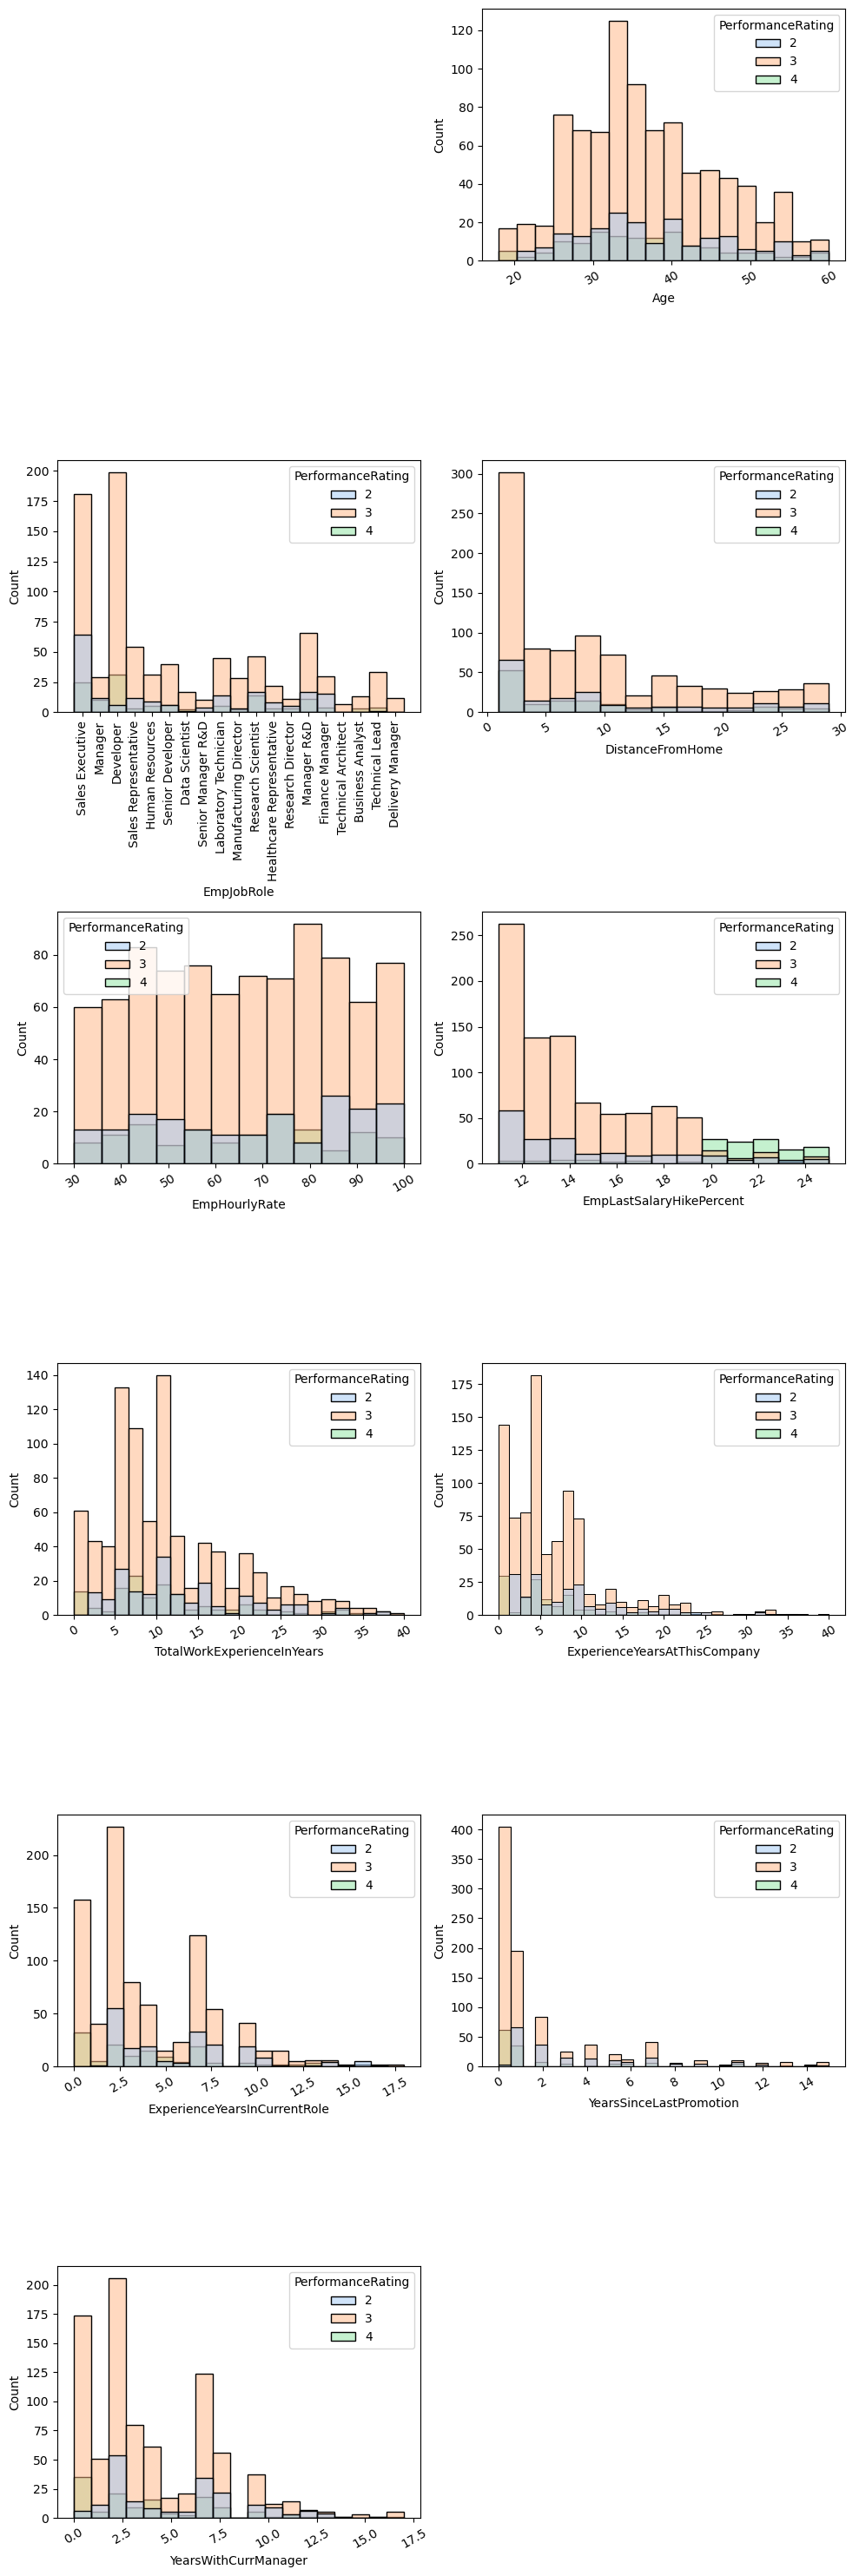

In [80]:
plt.figure(figsize = (10,50))
plotnumber = 1
for i in data_cont1:
    if plotnumber <= 11:
        if plotnumber == 1 :
            plotnumber += 1
            continue
        elif plotnumber == 3:
            plt.subplot(10,2,plotnumber)
            sns.histplot(x=data_cont1[i],hue=data['PerformanceRating'],palette='pastel')
            plt.xticks(rotation=90,fontsize=10)
            plotnumber=plotnumber+1
        else:
            plt.subplot(10,2, plotnumber)
            sns.histplot(x = data_cont1[i], hue = data['PerformanceRating'],palette='pastel')
            plt.xticks(rotation=30,fontsize=10)
            plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()

**1.Age vs PerformanceRating:**

->Performance rating of 3 dominates across all age groups.

->Younger employees (below 30) have slightly more ratings of 2.

->Older employees (above 50) are fewer but follow a similar trend.

**2.EmpjobRole vs PerformanceRating:**

->Performance rating of 3 dominates across all job roles (70-80%).

->Executives and Managers have slightly fewer high ratings (4).

->Very few employees, across all roles, achieve a performance rating of 4.

**3.DistanceFromHome vs PerformanceRating:**

->Most employees (70-80%) have a performance rating of 3, regardless of distance.

->Higher distance does not significantly impact performance ratings.

->Very few employees (5-10%) receive a rating of 4 at any distance.

**4.EmpHourlyRate vs PerformanceRating:**

->Performance rating remains consistent (70-80% in rating 3) across different hourly rates.

->Higher pay does not necessarily mean higher performance ratings.

->Only a small portion (5-10%) of employees achieve the highest rating (4).

**5.EmpLastSalaryHikePercent vs PerformanceRating:**

->Most employees (70-80%) receive a performance rating of 3, regardless of salary hike.

->Higher salary hikes (18%+) slightly increase the chances of getting a performance rating of 4.

->Low salary hikes (12-14%) have a higher percentage (20%) of employees rated 2.

**6.TotalWorkExperienceInYears vs PerformanceRating:**

->Performance rating of 3 is dominant across all experience levels (75-80%).

->Employees with very low experience (0-5 years) have a slightly higher chance (20%) of getting a rating of 2.

->Employees with 15+ years of experience have a better chance (15-20%) of getting a rating of 4.

**7.ExperienceYearsAtThisCompany vs PerformanceRating:**

->Newer employees (0-5 years) have a higher chance (20%) of getting a rating of 2.

->Employees with 10+ years at the company are more likely (15-20%) to receive a higher rating (4).

->Performance rating of 3 dominates across all experience levels (75-80%).

**8.ExperienceYearsInCurrentRole vs PerformanceRating:**

->70% of employees have 0-5 years of experience.

->60% of employees have a Performance Rating of 3.

->25% have a Performance Rating of 2.

->10-15% have a Performance Rating of 4.

->Employees with 10+ years of experience are very few.

**9.YearsSinceLastPromotion vs PerformanceRating:**

->75% of employees were promoted within the last 2 years.

->60% of employees have a Performance Rating of 3.

->25% have a Performance Rating of 2.

->10-15% have a Performance Rating of 4.

->Employees with 6+ years since their last promotion are very few.

**10.YearsWithCurrManager vs PerformanceRating:**

->70% of employees have been with their current manager for 0-5 years.

->60% of employees have a Performance Rating of 3.

->25% have a Performance Rating of 2.

->10-15% have a Performance Rating of 4.

->Very few employees have been with the same manager for 10+ years.

# DEAPARTMENT WISE PERFORMANCE RATING

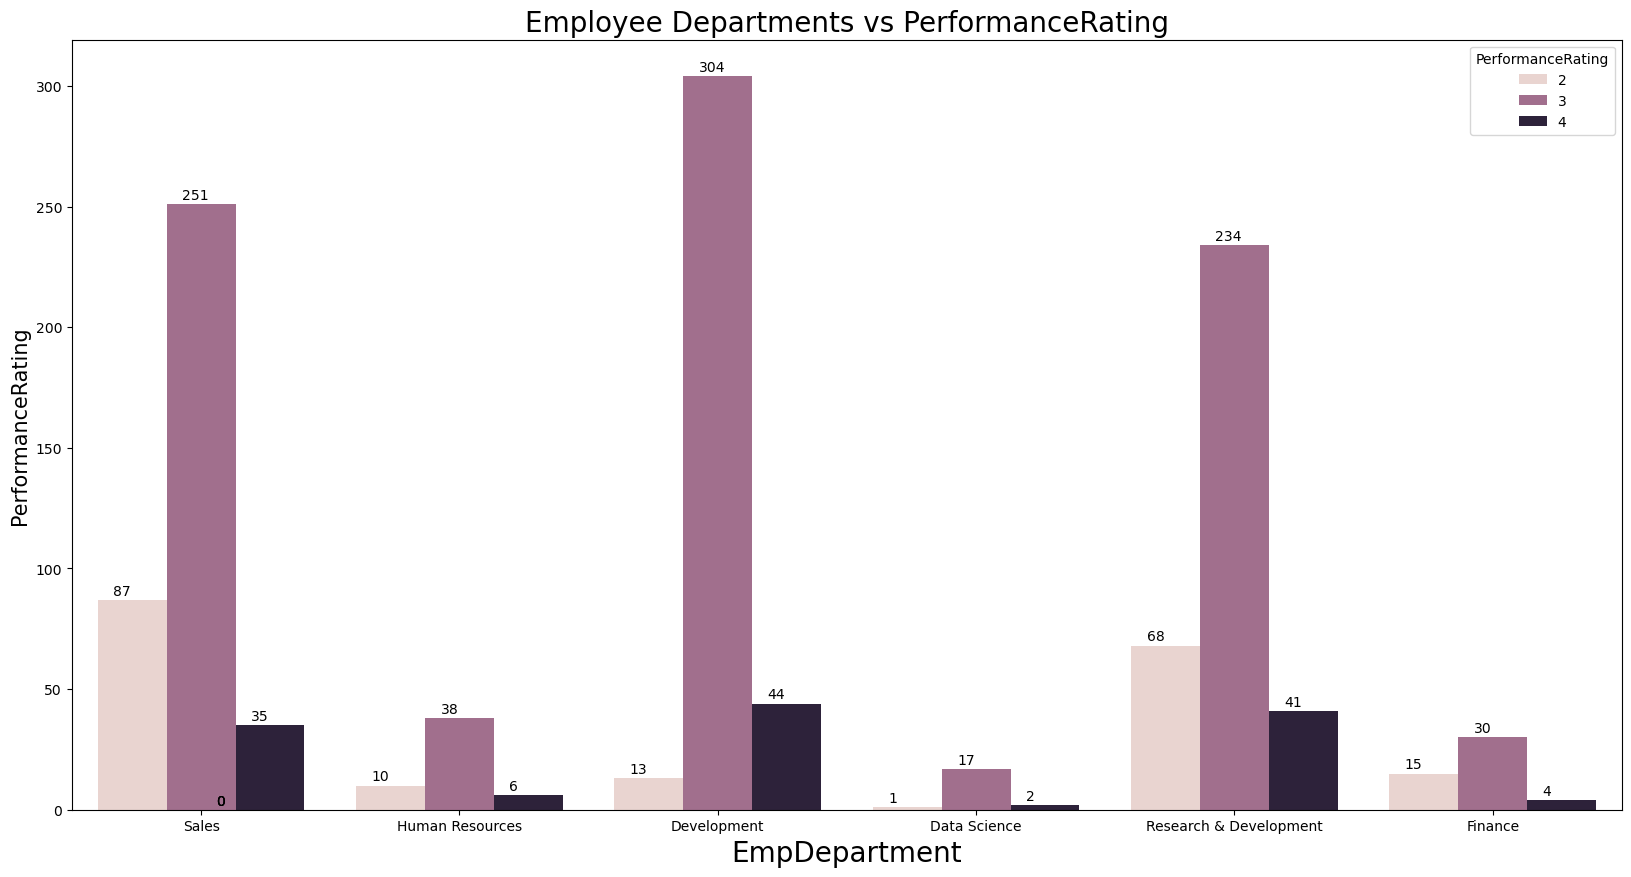

In [84]:
plt.figure(figsize=(20,10),facecolor='white')
ax = sns.countplot(x='EmpDepartment',hue=data.PerformanceRating,data=data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs PerformanceRating',fontsize=20)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

**SALES**:
The Performace rating level 3 is more in the sales department. The male performance rating the little bit higher compared to female.

**HUMAN RESOURCES**:
The majority of the employees lying under the level 3 performance . The older people are performing low in this department. The female employees in HR department doing really well in their performance.

**DEVELOPMENT**:
The majority of employees are level 3 performers. Employees of all age groups perform at level 3. Gender-based performance is nearly the same for both.

**DATA SCIENCE**:
The highest average Performance Level 3 is in the Data Science department. Data Science is the only department with fewer Level 2 performers. The overall performance in this department is higher compared to all others. Male employees are performing well in this department.

**RESEARCH & DEVELOPMENT**: 
The age factor is not deviating from the level of performance here where different employees with different age are there in every level of performance. The R&D has the good female employees in their performance.

**FINANCE**: 
The finance department performance is exponentially decreasing when age increases. The male employees are doing good. The experience factor is inversely relating to the performance level.

#### PERCENT COUNT IN EMPLOYEE DEPARTMENT WITH PERFORMANCE RATING

In [88]:
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment      Data Science  Development  Finance  Human Resources  \
PerformanceRating                                                        
2                          0.08         1.08     1.25             0.83   
3                          1.42        25.33     2.50             3.17   
4                          0.17         3.67     0.33             0.50   
All                        1.67        30.08     4.08             4.50   

EmpDepartment      Research & Development  Sales     All  
PerformanceRating                                         
2                                    5.67   7.25   16.17  
3                                   19.50  20.92   72.83  
4                                    3.42   2.92   11.00  
All                                 28.58  31.08  100.00

### Filtering those employees whose performance rating is low but working in thiscompany for less or equal to 2 years

In [91]:
low_per = data.loc[(data['PerformanceRating'] == 2) & (data['Attrition'] == 'No') & (data['EmpJobInvolvement']<= 2)
                  & (data['ExperienceYearsAtThisCompany'] <= 2),
                  ['EmpNumber','ExperienceYearsAtThisCompany','EmpJobInvolvement','Attrition','PerformanceRating']]
low_per

EmpNumber  ExperienceYearsAtThisCompany  EmpJobInvolvement Attrition  \
165   E1001300                             2                  2        No   
182   E1001322                             2                  2        No   
605   E1002079                             2                  2        No   
728   E1002291                             2                  2        No   
878    E100461                             2                  2        No   
1023   E100702                             2                  2        No   

      PerformanceRating  
165                   2  
182                   2  
605                   2  
728                   2  
878                   2  
1023                  2

**These 6 non performing employees can be penalized or given final warning for their performance.**

In [94]:
#To analyse on performance as per department & environment satisfaction wise

pivot1 = data.pivot_table(index = 'EmpDepartment', values = 'EmpEnvironmentSatisfaction',
                         columns = 'PerformanceRating', aggfunc='mean')
pivot1

PerformanceRating              2         3         4
EmpDepartment                                       
Data Science            1.000000  3.058824  3.000000
Development             1.461538  2.726974  2.954545
Finance                 1.600000  3.333333  3.750000
Human Resources         1.600000  2.842105  3.000000
Research & Development  1.602941  3.038462  3.219512
Sales                   1.586207  2.968127  3.028571

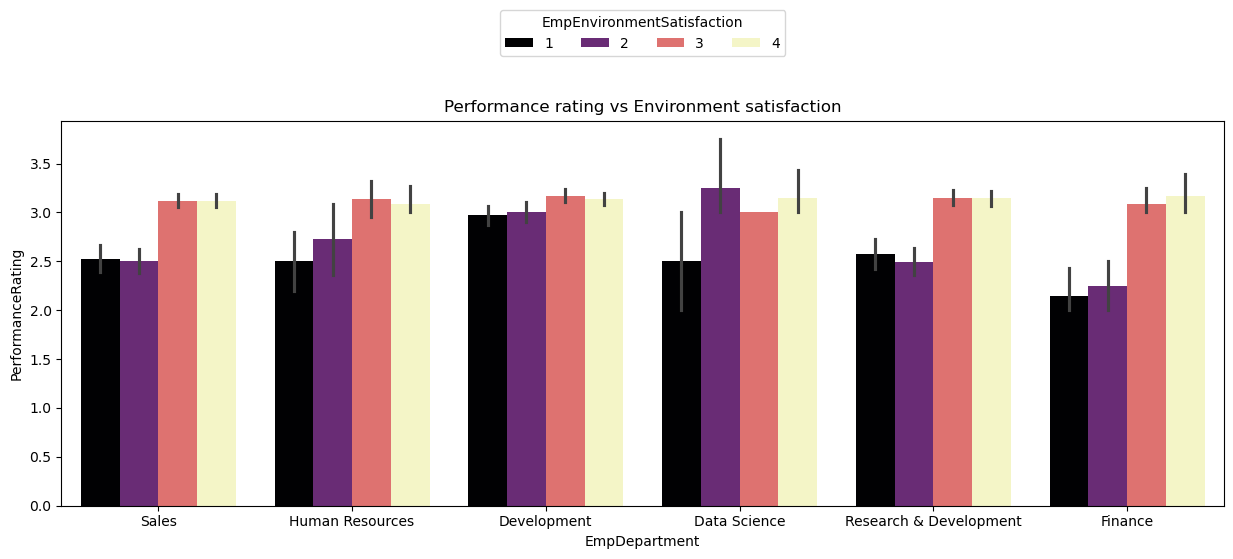

In [96]:
plt.subplots(figsize=(15, 5))
bar = sns.barplot(data = data, x= 'EmpDepartment', y = 'PerformanceRating',hue= 'EmpEnvironmentSatisfaction',
                  palette = 'magma').set(title = "Performance rating vs Environment satisfaction")
plt.legend(title="EmpEnvironmentSatisfaction", bbox_to_anchor=(0.5, 1.15), loc="lower center", ncol=4)
plt.show()

**->Employees with higher environment satisfaction (3 & 4) tend to have higher performance.**

**->Employees with lower environment satisfaction (1 & 2) generally have lower performance on average.**

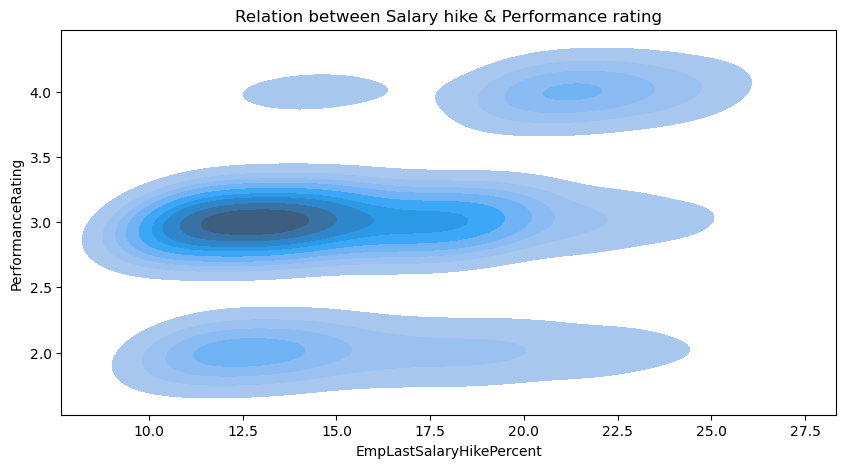

In [99]:
plt.subplots(figsize=(10, 5))
kde = sns.kdeplot(data=data, x="EmpLastSalaryHikePercent", y ='PerformanceRating',multiple="stack",
                  palette = 'viridis', fill = True, linewidth = 0)
kde.set(title = 'Relation between Salary hike & Performance rating')
plt.show()

**Employees with higher ratings (4) tend to receive better salary hikes.**

**many employees with a performance rating of 3 still receive hikes in the 12-15% range, similar to those with rating 4.**

**salary hikes are influenced by factors beyond just performance rating that might influence ratings, like job role and work environment.**

### Performance rating as per job involvement & job satisfaction

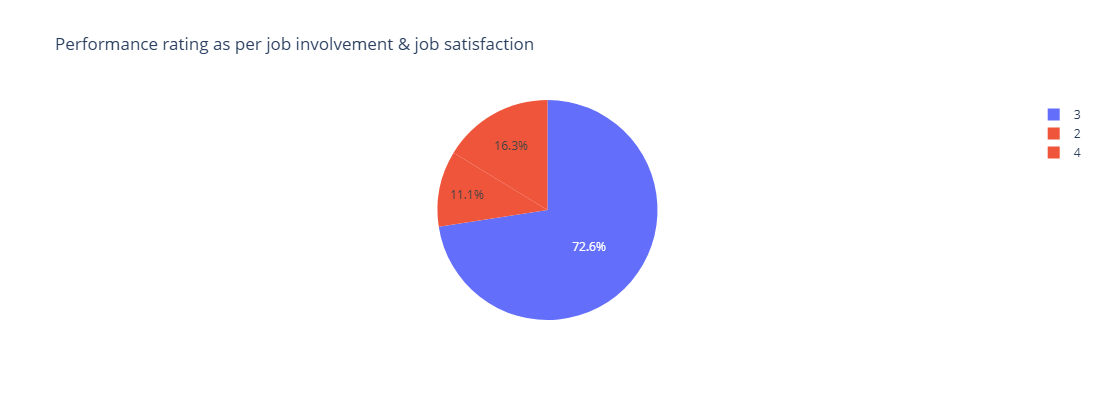

In [103]:
fig = px.pie(data, values='EmpJobSatisfaction', names= 'PerformanceRating', color= 'EmpJobInvolvement',
            title = 'Performance rating as per job involvement & job satisfaction',width=600, height=400)
fig.show()

**Majority of Employees (72.6%):**
Most employees fall into one category of performance rating based on their job involvement and job satisfaction.
This suggests that a large portion of employees have a similar level of job satisfaction and involvement, leading to a common performance rating.

**Smaller Segments (16.3% & 11.1%):**
These represent employees with different levels of job satisfaction and involvement, leading to variations in their performance ratings.

**Performance Rating of 4 (Highlighted Segment):**
The highlighted segment corresponds to employees with a performance rating of 4, job satisfaction of 365, and job involvement level of 2.
This suggests that even with moderate job involvement (level 2), high job satisfaction (365) can still lead to a high performance rating (4).

## TOP 3 FACTOR AFFECTING TO THE EMPLOYEE PERFORMANCE

1.Emp Environment Satisfaction

2.Emp Last Salary Hike Percent

3.Emp Work Life Balance

From above visualization, we can clearly observe that Salary hike, Environment satisfaction,Job satisfaction, Employee experience marked great impact on Performance ratings. So, from management side, they need to look after in these matters to increase the employees performance

### OBERSERVATION

**1.Employee Enviroment satisfaction:**
Maximum Number of Employees Performance Rating belongs to EmpEnvironmentSatisfaction Level 3 & Level 4, It contains 367 & 361.


**2.Employee last salary hike percent:**
More Number of Employees whose salary hike percentage belongs to 11-19 % are getting 2 & 3 performance rating Maximum time.Employees whose salary hike percentage is in between 20-22%, There performance rating is 4

**3.Employee work life balance:**
In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employees

### OVERVIEW

**From above visualization, we can clearly observe that Salary hike, Environment satisfaction,Job satisfaction, Employee experience marked great impact on Performance ratings. So, from management side, they need to look after in these matters to increase the employees performance.**